### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

### Base Function Defs

In [2]:
def a(x):
    return 1+x
def f(x):
    return np.ones_like(x)

In [3]:
def inf_norm(r):
    return np.max(np.abs(r))

In [4]:
def soln(x, alpha, beta, mixed=False):
    c2 = alpha
    if mixed:
        c1 = (beta + 1)*2 - 1
    else:
        c1 = (beta - c2 + 1) / np.log(2) - 1
    return (c1 + 1) * np.log(1+x) - x + c2

### show solutions

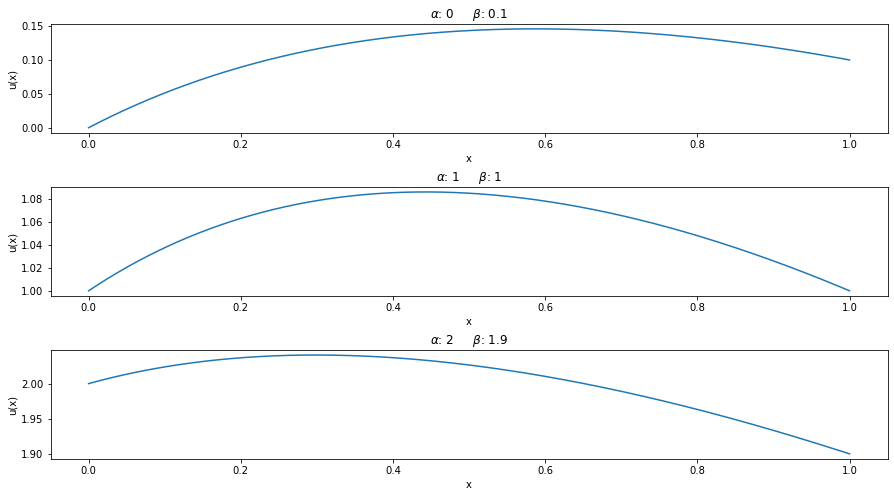

In [5]:
N = 1000
x = np.linspace(0,1,N)
fig, ax = plt.subplots(3,1,figsize=(15,8))
for i, (alpha, beta) in enumerate(zip([0, 1, 2],[0.1,1,1.9])):
    plt.subplot(3,1,i+1)
    plt.plot(x,soln(x, alpha, beta))
    plt.title(r'$\alpha$: '+str(alpha)+'\t'+r'$\beta$: '+str(beta))
    plt.xlabel('x')
    plt.ylabel('u(x)')
plt.subplots_adjust(hspace=0.5)
plt.savefig('lab3_plots/dirichlet_solns', bbox_inches='tight')

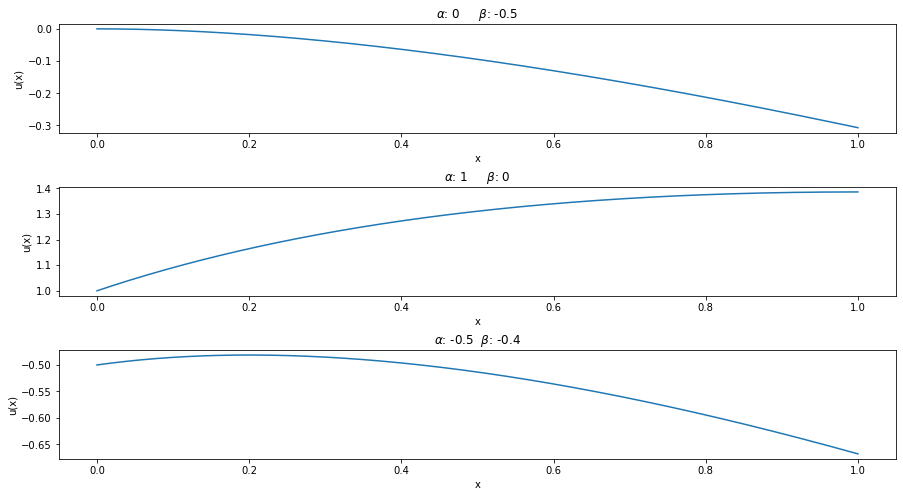

In [6]:
N = 1000
x = np.linspace(0,1,N)
fig, ax = plt.subplots(3,1,figsize=(15,8))
for i, (alpha, beta) in enumerate(zip([0, 1, -0.5],[-0.5,0,-0.4])):
    plt.subplot(3,1,i+1)
    plt.plot(x,soln(x, alpha, beta, mixed=True))
    plt.title(r'$\alpha$: '+str(alpha)+'\t'+r'$\beta$: '+str(beta))
    plt.xlabel('x')
    plt.ylabel('u(x)')
plt.subplots_adjust(hspace=0.5)
plt.savefig('lab3_plots/mixed_solns', bbox_inches='tight')

In [7]:
# def approx_soln(N, alpha, beta, mixed=False):
#     t = np.linspace(0,1,N)
#     h = t[1]-t[0]
#     A = np.zeros((N,N))
#     A[0,0] = 1
#     if mixed:
#         A[-1,-1]=3; A[-1,-2]=-4; A[-1,-3]=1
#         #A[-1] /= 2*h
#     else:
#         A[-1,-1] = 1
        
#     b = -1*f(t)
#     b[0] = alpha
#     b[-1] = beta
#     b = b.reshape(-1,1)

#     for i in range(1,N-1):
#         a_prime = (a(t[i+1]) - a(t[i-1]))/2/h
#         a_i = a(t[i])
#         A[i,i-1] = a_prime*(-1)/2/h + a_i/h/h
#         A[i,i]   =                  + a_i*(-2)/h/h
#         A[i,i+1] = a_prime*(+1)/2/h + a_i/h/h
#     return np.linalg.inv(A) @ b

In [8]:
def approx_soln(N, alpha, beta, mixed=False):
    t = np.linspace(0,1,N)
    h = t[1]-t[0]
    A = np.zeros((N,N))
    A[0,0] = -4*h*h
    if mixed:
        A[-1,-1] = 3; A[-1,-2] = -4; A[-1, -3] = 1
        A[-1] *= -4*h*h
    else:
        A[-1,-1] = -4*h*h
    b = f(t)
    b[0] = alpha
    b[-1] = beta

    for i in range(1,N-1):
        A[i,i-1] = -a(t[i+1]) + 4*a(t[i]) + a(t[i-1])
        A[i,i] = -8*a(t[i])
        A[i,i+1] = a(t[i+1]) + 4*a(t[i]) - a(t[i-1])
    return np.linalg.inv(A) @ b * (-4*h*h)

In [9]:
def fourth_order_approx_soln(N, alpha, beta, mixed=False):
    t = np.linspace(0,1,N)
    h = t[1]-t[0]
    A = np.zeros((N,N))
    A[0,0] = 1
    A[-1,-1] = 1
        
    b = -1*f(t)
    b[0] = alpha
    b[-1] = beta
    b = b.reshape(-1,1)

    a_prime = 1 #(-3*a(t[0])-10*a(t[1])+18*a(t[2])-9*a(t[3])+a(t[4]))/6/h
    a_i = a(t[1])
#     A[1,0] = a_prime*(-3)/6/h + a_i*(11)/12/h/h
#     A[1,1] =a_prime*(-10)/6/h + a_i*(-20)/12/h/h
#     A[1,2] = a_prime*(18)/6/h + a_i*(6)/12/h/h
#     A[1,3] = a_prime*(-6)/6/h + a_i*(4)/12/h/h
#     A[1,4] = a_prime*(+1)/6/h + a_i*(-1)/12/h/h
    A[1,0] = a_prime*(-1)/2/h + a_i/h/h
    A[1,1] =                    a_i*(-2)/h/h
    A[1,2] = a_prime/2/h      + a_i/h/h
    
    a_prime = 1 #(-3*a(t[-1])-10*a(t[-2])+18*a(t[-3])-9*a(t[-4])+a(t[-5]))/6/h
    a_i = a(t[-2])
#     A[-2,-1] = a_prime*(3)/6/h + a_i*(11)/12/h/h
#     A[-2,-2] = a_prime*(10)/6/h + a_i*(-20)/12/h/h
#     A[-2,-3] = a_prime*(-18)/6/h + a_i*(6)/12/h/h
#     A[-2,-4] = a_prime*(6)/6/h + a_i*(4)/12/h/h
#     A[-2,-5] = a_prime*(-1)/6/h + a_i*(-1)/12/h/h
    A[-2,-1] = a_prime*(1)/2/h + a_i/h/h
    A[-2,-2] =                   a_i*(-2)/h/h
    A[-2,-3] = a_prime*(-1)/2/h+ a_i/h/h

    for i in range(2,N-2):
        a_prime = (a(t[i-2]) -8*a(t[i-1]) +8*a(t[i+1]) -a(t[i+2]))/12./h
        a_i = a(t[i])
        A[i,i-2] = a_prime*(+1)/12/h + a_i*(-1)/12/h/h
        A[i,i-1] = a_prime*(-8)/12/h + a_i*(+16)/12/h/h
        A[i,i] =                       a_i*(-30)/12/h/h
        A[i,i+1] = a_prime*(+8)/12/h + a_i*(+16)/12/h/h
        A[i,i+2] = a_prime*(-1)/12/h + a_i*(-1)/12/h/h
    return (np.linalg.inv(A) @ b).flatten()

In [10]:
alpha = 0.
beta = 0.

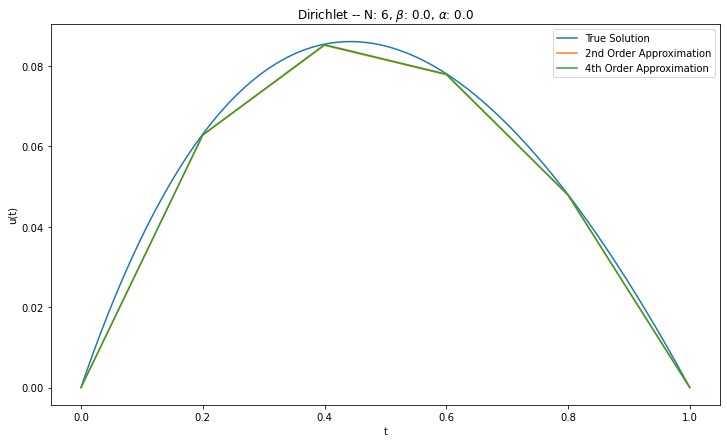

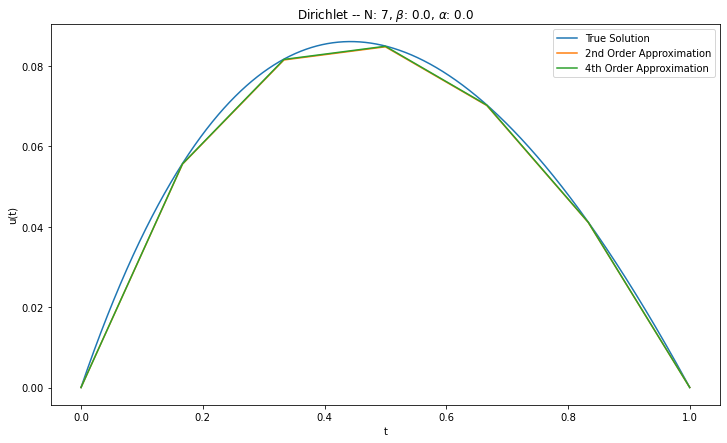

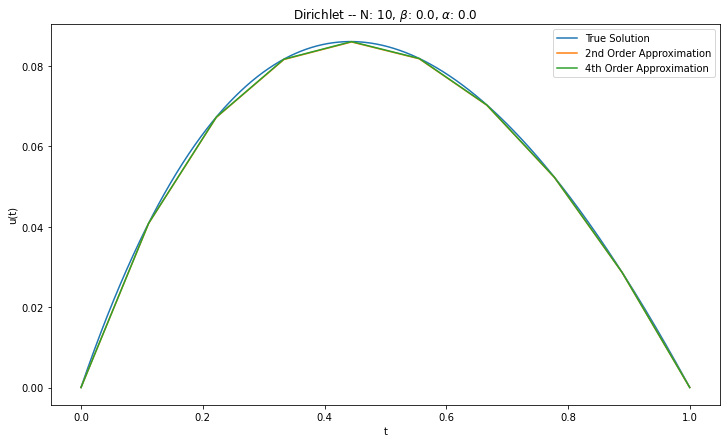

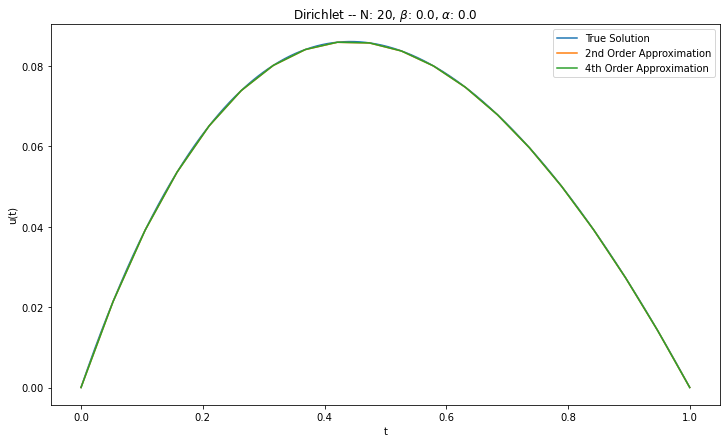

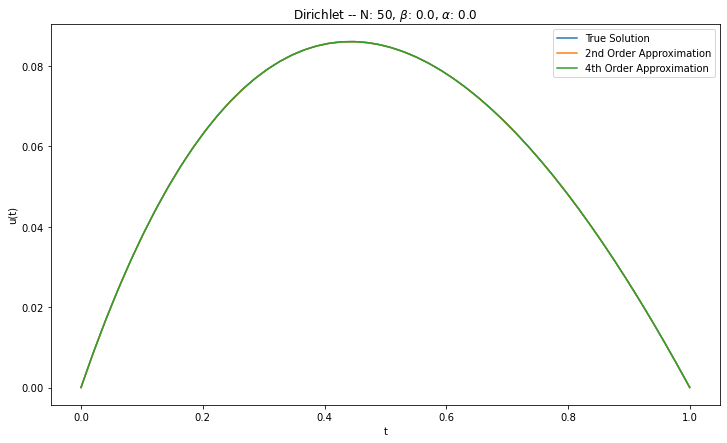

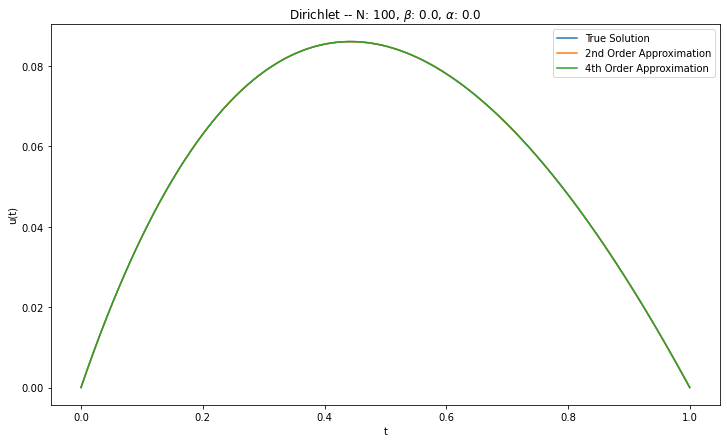

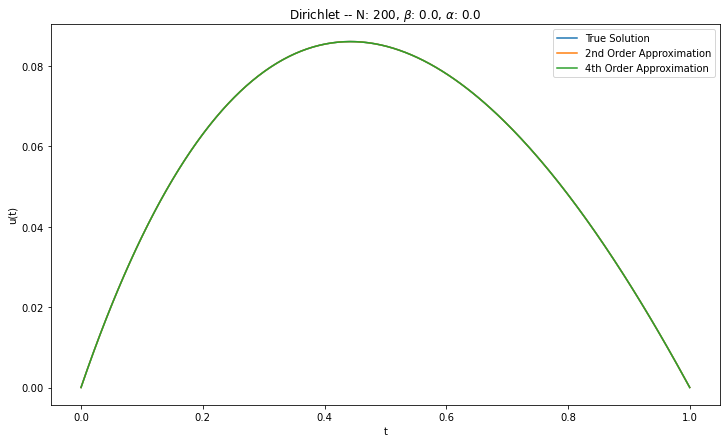

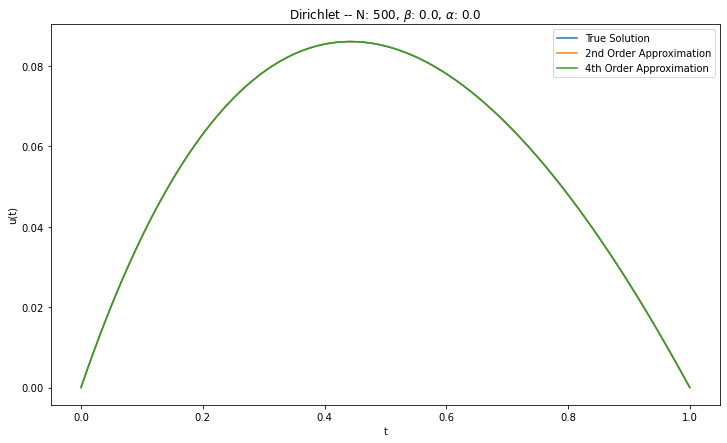

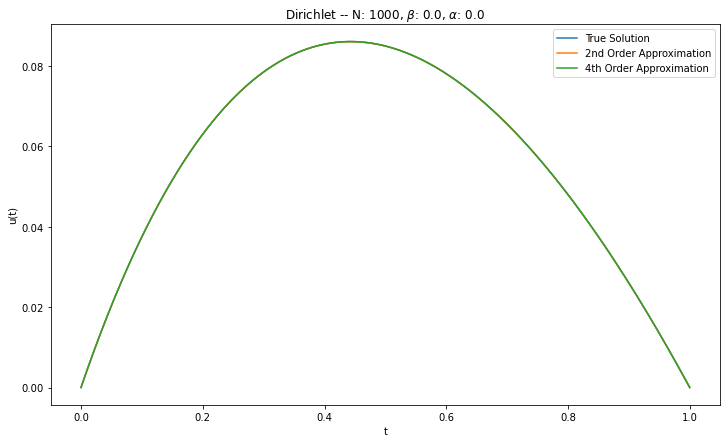

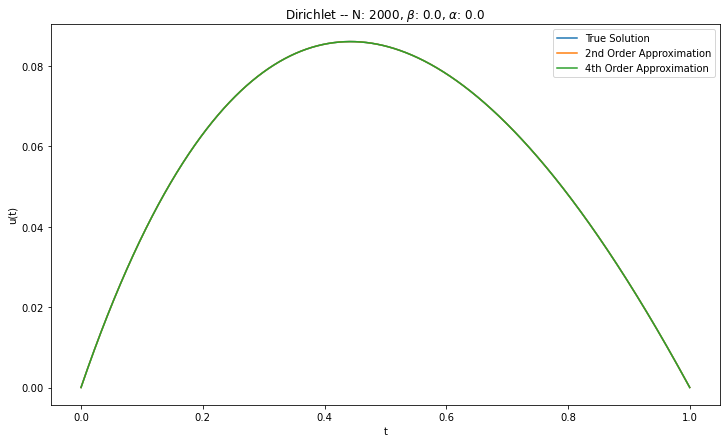

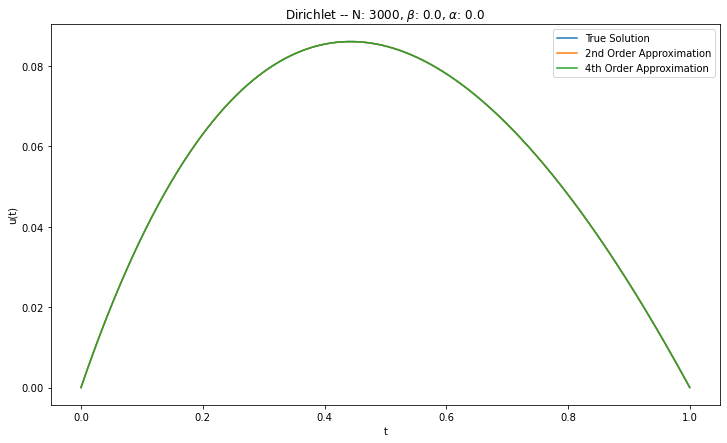

In [11]:
err = []
for N in [6, 7, 10, 20, 50, 100, 200, 500, 1e3, 2e3, 3e3]:
    N = int(N)
    fig = plt.figure(figsize=(12,7))
    x_dense = np.linspace(0,1,10**5)
    plt.plot(x_dense, soln(x_dense, alpha, beta), label='True Solution')
    plt.plot(np.linspace(0,1,N), approx_soln(N, alpha, beta), label='2nd Order Approximation')
    plt.plot(np.linspace(0,1,N), fourth_order_approx_soln(N, alpha, beta), label='4th Order Approximation')
    plt.title('Dirichlet -- N: '+str(N)+r', $\beta$: '+str(beta)+r', $\alpha$: '+str(alpha))
    plt.xlabel('t')
    plt.ylabel('u(t)')
    
    r = soln(np.linspace(0,1,N), alpha, beta) - approx_soln(N, alpha, beta) 
    r2 = soln(np.linspace(0,1,N), alpha, beta) - fourth_order_approx_soln(N, alpha, beta)      
    err.append([N, np.max(np.abs(r)), np.max(np.abs(r2))])

    plt.legend();
    plt.savefig('lab3_plots/dirichlet_N_'+str(N), bbox_inches='tight')
    plt.show()
    print()

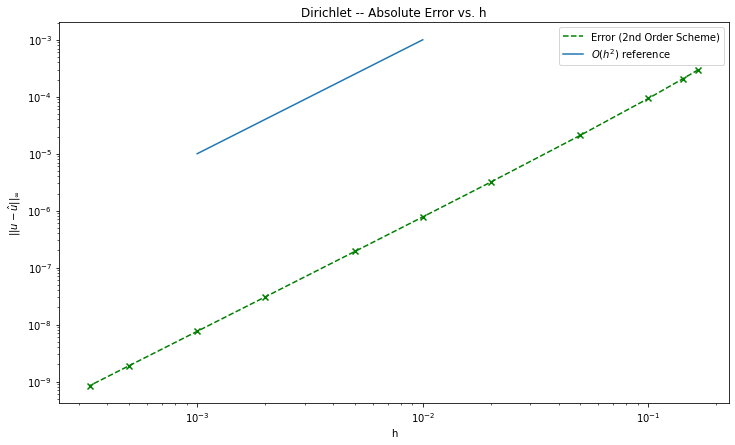

In [12]:
plt.figure(figsize=(12,7))
err = np.array(err)
plt.scatter(1./err[:,0], err[:,1], marker='x', color='green')
plt.plot(1./err[:,0], err[:,1], linestyle='--', color='green', label='Error (2nd Order Scheme)')
plt.plot([1e-2, 1e-3], [1e-3, 1e-5], label=r'$O(h^2)$ reference')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$||u-\hat{u}||_{\infty}$')
plt.xlabel('h')
plt.title('Dirichlet -- Absolute Error vs. h');
plt.savefig('lab3_plots/dirichlet_error_0', bbox_inches='tight')


In [13]:
plt.figure(figsize=(12,7))
err = np.array(err)
plt.scatter(1./err[:,0], err[:,1], marker='x', color='green')
plt.plot(1./err[:,0], err[:,1], linestyle='--', color='green', label='Error (2nd Order Scheme)')
plt.scatter(1./err[:,0], err[:,2], marker='x', color='red')
plt.plot(1./err[:,0], err[:,2], linestyle='--', color='black', label='Error (4th Order Scheme)')
plt.plot([1e-2, 1e-3], [1e-3, 1e-5], label=r'$O(h^2)$ reference')
plt.plot([1e-2, 1e-3], [1e-3, 1e-7], label=r'$O(h^4)$ reference')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$||u-\hat{u}||_{\infty}$')
plt.xlabel('h')
plt.title('Dirichlet -- Absolute Error vs. h');
plt.savefig('lab3_plots/dirichlet_error', bbox_inches='tight')


In [14]:
alpha = 0
beta = 0

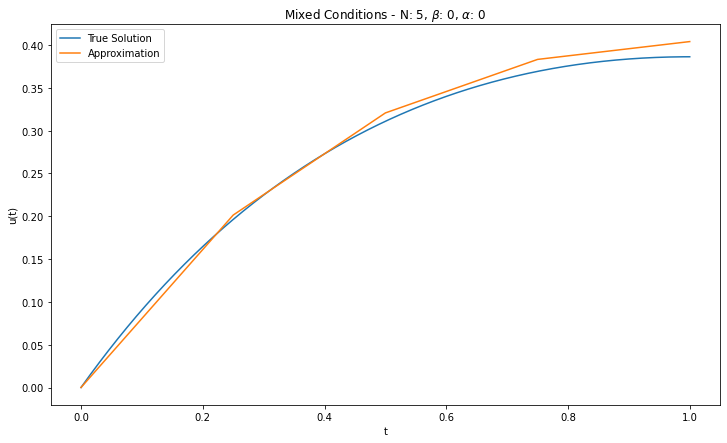

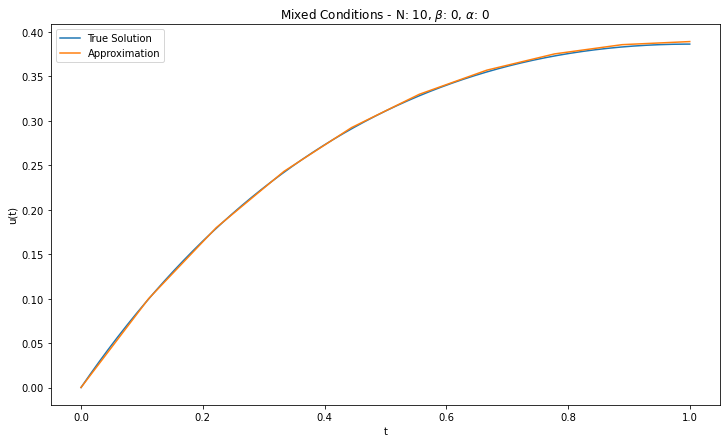

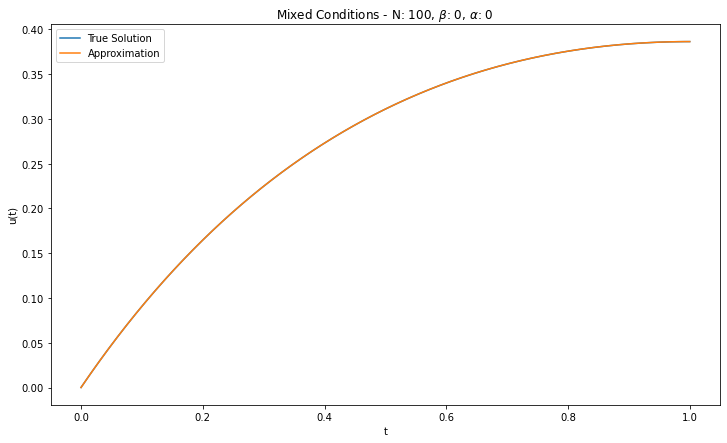

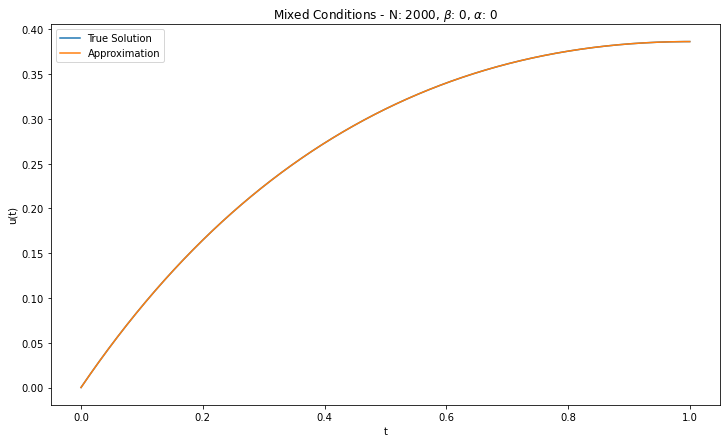

In [15]:
err = []
for N in [5, 10, 20, 50, 100, 200, 500, 1e3, 2e3, 3e3]:
    N = int(N)
    fig = plt.figure(figsize=(12,7))
    plt.plot(x_dense, soln(x_dense, alpha, beta, mixed=True), label='True Solution')
    plt.plot(np.linspace(0,1,N), approx_soln(N, alpha, beta, mixed=True), label='Approximation')
    plt.legend();
    plt.title('Mixed Conditions - N: '+str(N)+r', $\beta$: '+str(beta)+r', $\alpha$: '+str(alpha))
    plt.xlabel('t')
    plt.ylabel('u(t)')
    r = soln(np.linspace(0,1,N), alpha, beta, mixed=True) - approx_soln(N, alpha, beta, mixed=True) 
    err.append([N, np.max(np.abs(r))])
    plt.savefig('lab3_plots/mixed_N_'+str(N), bbox_inches='tight')
    plt.show()
    print()

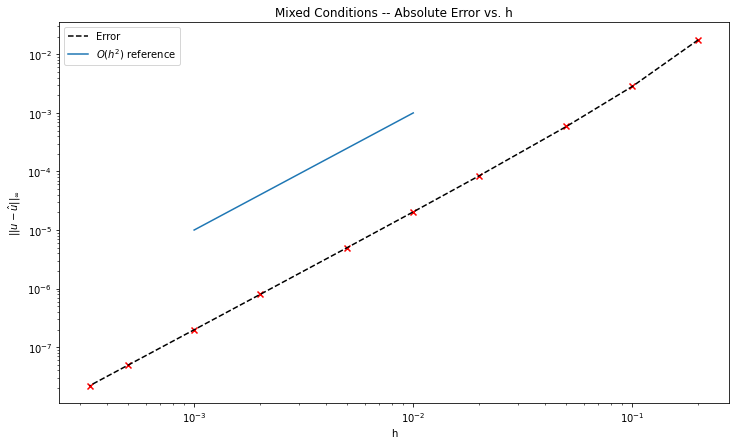

In [16]:
plt.figure(figsize=(12,7))
err = np.array(err)
plt.scatter(1./err[:,0], err[:,1], marker='x', color='red')
plt.plot(1./err[:,0], err[:,1], linestyle='--', color='black', label='Error')
plt.plot([1e-2, 1e-3], [1e-3, 1e-5], label=r'$O(h^2)$ reference')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$||u-\hat{u}||_{\infty}$')
plt.xlabel('h')
plt.title('Mixed Conditions -- Absolute Error vs. h');
plt.savefig('lab3_plots/mixed_error', bbox_inches='tight')